<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
<span style="font-size:18px;">
EARLY STAGE DIABETES RISK PREDICTION
    </span>
    </p>
    </div>

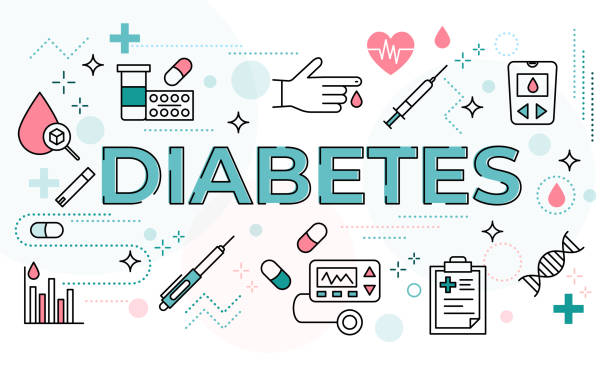


## INTRODUCTION

<span style="font-size:16px;"> Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood glucose. Hyperglycaemia, also called raised blood glucose or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels. <br/> <br/>According to WHO, In 2014, 8.5% of adults aged 18 years and older had diabetes. In 2019, diabetes was the direct cause of 1.5 million deaths and 48% of all deaths due to diabetes occurred before the age of 70 years. Another 460 000 kidney disease deaths were caused by diabetes, and raised blood glucose causes around 20% of cardiovascular deaths (1).<br/> <br/> Between 2000 and 2019, there was a 3% increase in age-standardized mortality rates from diabetes. In lower-middle-income countries, the mortality rate due to diabetes increased 13%. </span>

> **DATA SOURCE**

<span style="font-size:16px;">This dataset includes the evidence and symptoms of newly diabetic or developing diabetes disease in the Human body. The data file has been collected from Kaggle website </span>

> **OBJECTIVES**

<span style="font-size:16px;">  
    To prepare data to build Machine learning models  <br/>
    To build the model using different machine learning algorithms<br/>
    To identify features that affect the performances of the model (feature importances)
    To evaluate the performances of the model using recall scores<br/>
    Learn and create simple decision rules to enable non-ml medical providers diagnose themselves<br/>
    Examine probabilities and likelihood of the occurence of early stage diabetes <br/>
    Future likelihood of ESD based on changes to current features<br/>


</span>
    

> **RESEARCH QUESTIONS**

<span style="font-size:16px;">  
    What is the distribution of the population of people with the risk of having of having diabetes? <br/>
    Which gender is most likely to have a diabetes?<br/>
    What are the symptoms that contributes most to having diabetes?<br/>
    Does age determine the possibilities of having diabetes? <br/>
    Which age-groups are mostly with the risk of having diabetes? <br/>
    Does obesity determine the risk of having diabetes? <br/>
</span>

> **MEDICAL TERMS AND DEFINITIONS**

<span style="font-size:16px;">**Polyuria** is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate. Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres. <br/> <br/> **Polydipsia** is a medical name for the feeling of extreme thirstiness. Polydipsia is often linked to urinary conditions that cause you to urinate a lot. This can make your body feel a constant need to replace the fluids lost in urination. It can also be caused by physical processes that cause you to lose a lot of fluid.<br/> <br/> **Genital Thrush (or candidiasis)** is a common condition caused by a type of yeast called Candida. It mainly affects the vagina, though may affect the penis too, and can be irritating and painful. Many types of yeast and bacteria naturally live in the vagina and rarely cause problems. <br/> <br/> **Partial Paresis** Paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal. <br/> <br/> **Polyphagia** also known as hyperphagia, is the medical term for excessive or extreme hunger. It's different than having an increased appetite after exercise or other physical activity. While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food. <br/> <br/> **Alopecia** Areata is a condition that causes hair to fall out in small patches, which can be unnoticeable.</span>

**Dataset Information:**

* **Age** 1.20-65

* **Sex** 1. Male, 2.Female

* **Polyuria** 1.Yes, 2.No.

* **Polydipsia** 1.Yes, 2.No.

* **sudden weight loss** 1.Yes, 2.No.

* **weakness** 1.Yes, 2.No.

* **Polyphagia** 1.Yes, 2.No.

* **Genital thrush** 1.Yes, 2.No.

* **visual blurring** 1.Yes, 2.No.

* **Itching** 1.Yes, 2.No.

* **Irritability** 1.Yes, 2.No

* **delayed healing** 1.Yes, 2.No.

* **partial paresis** 1.Yes, 2.No.
 
* **muscle stiffness** 1.Yes, 2.No

* **Alopecia** 1.Yes, 2.No.

* **Obesity** 1.Yes, 2.No.

* **Class** 1.Positive, 2.Negative.

# Data Preparation

**Import Libraries**

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import shap  # package used to calculate Shap values
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc,roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import plot_tree
import eli5
from eli5.sklearn import PermutationImportance




**Obtain data file path**

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


**Load data**

In [ ]:
diab_data=pd.read_csv('/kaggle/input/early-stage-diabetes-risk-prediction-dataset/diabetes_data_upload.csv')

**View data**

**Preview the first five rows of the dataset**

In [ ]:
diab_data.head()

**Preview the last five rows of the dataset**

In [ ]:
diab_data.tail()

# Data Exploration

Preview the column names of the dataset

In [ ]:
diab_data.columns

In [ ]:
diab_data.shape #check the number of rows and columns in the dataset

**Statistical information of the dataset**

In [ ]:
diab_data.info()

**Descriptive analysis of the dataset**

In [ ]:
diab_data.describe(include='all')

> **Observations**

The dataset has more categorical features**(0s and 1s)** except age. The dataset has 520 observations for analysis,the average age of individuals in the dataset is 48, the youngest individual is 16 years of age and the oldest is 90 years. There are more males with 328 occurences in the dataset, also we have more individuals that are susceptible to be diabetic **(class = positive)** in the dataset.

# Data Cleaning

**Check null values/missing data**

In [ ]:
diab_data.isnull().sum()

> **Observation**

There are no missing values in the dataset

**Check for duplicates**

In [ ]:
diab_data.duplicated().sum()

**Preview the first five duplicated rows in the dataset**

In [ ]:
diab_data[diab_data.duplicated()].head()

# Feature Engineering


In [ ]:
diab_data.head() #preview the changes made to the column headers

**Create a copy of the dataset and new feature 'age group'**

In [ ]:
diab_data1 = diab_data.copy()

def age(i):
    for x in range(10,100,10):
        if i<x:
            m = f'{x-10}-{x}'
            return m
            break

diab_data1['age_group'] = diab_data['Age'].apply(lambda x:age(x))
diab_data1.head()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

for column in diab_data.columns[1:]:
    diab_data[column] =  label_encoder.fit_transform(diab_data[column])
    
diab_data.head()

In [ ]:
neg = len(diab_data[diab_data['class']==0])
pos = len(diab_data[diab_data['class']==1])

pct_of_neg = neg/(neg+pos)
print("percentage of negative class is", pct_of_neg*100)
pct_of_pos = pos/(neg+pos)
print("percentage of positive class is", pct_of_pos*100)

> **Observation**

The dataset is fairly balanced in which 38% of the dataset are not diabetic and 62% have positive status.

# Training the Data

We need to split  our dataset before we train it. X will contain all independent while y will contain dependent variables ('status')


In [ ]:
X = diab_data.drop('class', axis =1)
y = diab_data['class']

<span style= "font-size:20px; font-weight:bold;">Data Normalization</span>

In [ ]:
X_norm=(X-X.mean())/X.std()

X_norm = pd.DataFrame(X_norm)
X_norm

<span style= "font-size:18px; font-weight:bold;">Train and Test Split</span>

After sucessfully splitting the dataset into independent and dependent variables, we need to further split it into training and testing set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size = 0.2, stratify=y, random_state = 1)

In [ ]:
print('The shape of X_train', X_train.shape)
print('The shape of X_test', X_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test', y_test.shape)

In [ ]:
y_train.value_counts() # distribution of target variable in training set

In [ ]:
sns.countplot(x=y_train); 

> **Observation**

The training set in the target variable is considered to be balanced because we have over 50% of each class. 

In [ ]:
y_test.value_counts() # distribution of target variable in test set

<span style= "font-size:18px; font-weight:bold;">Baseline Score</span>

In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy:', round(acc_baseline,4))

# **Building the Models**

We will be using three models i.e Logistic Regression,Decison Tree, Random Forest and Support Vector Machine to get the best metric scores on the imbalanced data and later on the balanced dataset.As a performance measure, accuracy is inappropriate for imbalanced classification problems.  **Recall** will be used to evaluate our models. It is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.  **Recall** is appropriate when minimizing **false negatives** is the focus.

<span style= "font-size:20px; font-weight:bold;"> Logistic Regression</span>

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

In [ ]:
lr = LogisticRegression()
lr

In [ ]:
lr.fit(X_train, y_train)
print(f'model score on training data: {lr.score(X_train, y_train)}')
print(f'model score on testing data: {lr.score(X_test, y_test)}')

In [ ]:
print(len(X_train.columns.tolist()))
len(lr.coef_[0])

<span style= "font-size:18px; font-weight:bold;">Feature Importance for Logistic Regression</span>

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(x = lr.coef_[0], y = X_train.columns.tolist())
plt.title('Logistic Regression Feature Importances');

 > **Observation**

 The chart above shows the features that are most important for an individual to be at risk of having diabetes. we are going to consider nine most important features / symptoms,they are Polydipsia, polyuria, partial paresis, irritability, sudden weight loss, genital thrush, polyphagia,visual blurring,weakness.

<span style= "font-size:18px; font-weight:bold;">Permutation Importance for Logistic Regression</span>

In [ ]:
perm = PermutationImportance(lr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

<span style= "font-size:18px; font-weight:bold;">Show partial dependency plot</span>

In [ ]:
feature_name = 'Polydipsia'
PartialDependenceDisplay.from_estimator(lr, X_test, [feature_name])
plt.show()

In [ ]:
lr_pred = lr.predict(X_test)
lr_pred
diab_data_pred=pd.merge(X_test,pd.DataFrame(lr_pred,columns=['predicted']),left_index=True,right_index=True)
diab_data_pred.head(10)

> **Observation**

**The predicted outcomes are added to the test dataset under the feature ‘predicted’.**

In [ ]:
sns.regplot(x='Age', y = 'predicted', data= diab_data_pred, logistic= True, ci=None);

<span style= "font-size:18px; font-weight:bold;">Probability of Occurence</span>

We will apply predict_proba function to generate the probability values of diabetes outcomes. From the test case below,we understand the difference between outcomes using Predict(1,0)and the predict_proba(the probability of occurence of 1, 0 i.e. 0.99, 0.00)

In [ ]:
lr_proba = lr.predict_proba(X_test[:5])
lr_proba = pd.DataFrame(lr_proba)
lr_proba


<span style= "font-size:18px; font-weight:bold;">Confusion Matrix for Logistic Regression</span>

Confusion matrix, a table that describes the performance of a classification model. Confusion Matrix tells us how many our model predicted correctly and incorrectly in terms of binary/multiple outcome classes by comparing actual and predicted cases.

In [ ]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, lr_pred))

<span style= "font-size:20px; font-weight:bold;">Random Forest Classifier </span>

Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

In [ ]:
rf = RandomForestClassifier(random_state= 10)
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

print (f'model score on training data: {rf.score(X_train, y_train)}')
print (f'model score on testing data: {rf.score(X_test, y_test)}')

In [ ]:
print(len(X_train.columns.tolist()))
len(rf.feature_importances_)

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(x = rf.feature_importances_, y = X_train.columns.tolist())
plt.title('Random Forest Feature Importances');

<span style= "font-size:20px; font-weight:bold;">Permutation Importance for Random Forest Classifier</span> 

In [ ]:
perm = PermutationImportance(rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
feature_name = 'Polyuria'
PartialDependenceDisplay.from_estimator(rf, X_test, [feature_name])
plt.show()

In [ ]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

<span Style="font-size:18px; font-weight:bold;"> Observation</span> 

We predicted 0.97, whereas the base_value is 0.6136. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact comes from Polyuria and Polydipsia. Though the Gender has a meaningful effect decreasing the prediction.

In [ ]:
diab_data_pred1 = pd.merge(X_test,pd.DataFrame(rf_pred,columns=['predicted']),left_index=True,right_index=True)
diab_data_pred1.head(10)

<span style= "font-size:18px; font-weight:bold;">Confusion Matrix for Random Forest</span>

In [ ]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, rf_pred))

<span style= "font-size:20px; font-weight:bold;">Support Vector Machine</span>


In [ ]:
# Building a Support Vector Machine on train data

svc = SVC(C= .1, kernel='linear', gamma= 1)
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

print (f'model score on training data: {svc.score(X_train, y_train)}')
print (f'model score on testing data: {svc.score(X_test, y_test)}')

In [ ]:
print(len(X_train.columns.tolist()))
len(svc.coef_[0])

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(x = svc.coef_[0], y = X_train.columns.tolist())
plt.title ('Support Vector Feature Importances');

In [ ]:
diab_data_pred2=pd.merge(X_test,pd.DataFrame(svc_pred,columns=['predicted']),left_index=True,right_index=True)
diab_data_pred2.head(10)

<span style= "font-size:18px; font-weight:bold;">Confusion Matrix for Support Vector Machine</span>

In [ ]:
sns.heatmap(confusion_matrix(y_test, svc_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Support Vector Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, svc_pred))

<span style= "font-size:20px; font-weight:bold;">Decision Tree Classifier</span>

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=1234)
dt.fit(X, y)

dt_pred = dt.predict(X_test)

print (f'model score on training data: {dt.score(X_train, y_train)}')
print (f'model score on testing data: {dt.score(X_test, y_test)}')

<span style= "font-size:18px; font-weight:bold;">Confusion Matrix for Decision Tree Classifier</span>

In [ ]:
sns.heatmap(confusion_matrix(y_test, dt_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, dt_pred))

<span style= "font-size:18px; font-weight:bold;">Extract Decision Rules </span>

In [ ]:
feature_names = diab_data.drop('class', axis = 1)
class_name = diab_data['class']

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [ ]:
rules = get_rules(dt, diab_data.columns, diab_data['class'])
for r in rules:
    print(r)


<span style= "font-size:20px; font-weight:bold;">Plot Decision Tree</span>

In [ ]:
fig, ax = plt.subplots(figsize=(25,12))
#plot tree
plot_tree(
    decision_tree = dt,
    feature_names = X_train.columns,
    filled = True, #colour leaf with class
    rounded = True, # round leaf edges
    proportion = True, #Display proportion of classes in leaf
    max_depth = 3, # only display first 3 levels
    fontsize = 12, # Enlarge font
    ax=ax, # place in figure axis
);


# **AUC-ROC CURVE**

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_pred)
AreaUnderCurve = round( auc(false_positive_rate, true_positive_rate) ,3)

print('Area Under Curve (AUC) = ',AreaUnderCurve)

plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %.3f'% AreaUnderCurve)

plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

# **PRECISION-RECALL CURVE**

In [ ]:
y_score = lr.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Diabetes Risk', fontsize=18)
plt.legend(loc="lower right")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    <span style="font-size:18px;">CONCLUSION</span></p></div>
    
Thus far, we have been able to do the following:
* Performed feature engineering to get a complete view of our data
* Performed several machine learning algorithms to predict whether or not someone is diabetic or not
We looked at:

>     Decision Trees

>     Logistic Regression

>     Random Forest CLassifer

>     Support Vector Machine

And, Random Forest Classifier performed greatly and I decided that it would be the model I would select.

* Performed some metrics to determine the performance of the models. My focus is on Recall Score
* Performed AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve and we were able to get 0.992 which means the model was able to predict 0 classes as 0 and 1 classes as 1.

# **REFERENCES**

**About Diabetes-** https://www.who.int/news-room/fact-sheets/detail/diabetes

**Factors that causes diabetes -** https://my.clevelandclinic.org/health/diseases/7104-diabetes

**Beautifying Jupyter Notebook -** www.kaggle.com/code/shubhamksingh/create-beautiful-notebooks-formatting-tutorial/notebook

**How to make clean visualizations -** www.kaggle.com/code/gaetanlopez/how-to-make-clean-visualizations/notebook

